# ChatGPT Summary & Link

https://github.com/nehan-p/sta130/blob/main/Simple%20Linear%20Regression%20Simulation.pdf

We started by discussing a question that required performing a permutation test and creating a bootstrap confidence interval to assess the difference in eruption durations between short and long wait times at Old Faithful. I explained the theoretical concepts behind both approaches, detailing how each method works and why they are used.

You ran the provided code and shared the output, which showed an observed difference of approximately -2.20 minutes and a permutation test p-value of 0.0, indicating strong evidence of a significant difference. The 95% bootstrap confidence interval for the difference in means was also calculated, ranging from -2.30 to -2.10, further confirming the significance of the results.

I then helped you interpret these results. We discussed how the permutation test uses label shuffling to simulate the null hypothesis and why a p-value of 0.0 means the observed difference is highly unlikely under random chance. The bootstrap interval's exclusion of zero reinforced the finding that long waits lead to significantly longer eruptions.

Next, you asked for explanations of the sampling approaches in simpler terms. I summarized how the permutation test involves random shuffling to test the null hypothesis, while the bootstrap method uses repeated sampling with replacement to construct a confidence interval for the difference in means.

We then addressed a comparison question between these non-parametric methods and the indicator variable model from a previous question. I explained that while all methods aim to detect differences in eruption durations, the permutation and bootstrap methods are non-parametric and make fewer assumptions about the data. In contrast, the indicator variable model is parametric, relying on linear regression and assumptions about normality and linearity.

Finally, we worked to ensure the explanations and comparisons were concise and easy to understand, revising the responses for clarity and simplifying complex concepts. You asked for a summary of our chat, which I provided, and then expanded upon to give a more comprehensive overview of everything we covered.

In [1]:
!pip install -U kaleido


# Question 1

In Simple Linear Regression (SLR), the outcome variable (
𝑌
𝑖
Y
i
​
 ) is predicted using a linear relationship with a predictor variable (
𝑥
𝑖
x
i
​
 ), represented by the equation
𝑌
𝑖
=
𝛽
0
+
𝛽
1
𝑥
𝑖
+
𝜖
𝑖
Y
i
​
 =β
0
​
 +β
1
​
 x
i
​
 +ϵ
i
​
 . Here,
𝛽
0
β
0
​
  is the intercept, showing the expected value of
𝑌
𝑖
Y
i
​
  when
𝑥
𝑖
=
0
x
i
​
 =0, and
𝛽
1
β
1
​
  is the slope, indicating how much
𝑌
𝑖
Y
i
​
  changes for each unit increase in
𝑥
𝑖
x
i
​
 . The error term,
𝜖
𝑖
ϵ
i
​
 , represents random variation and is generated from a normal distribution to add noise to the linear relationship. In this simulation,
𝑥
𝑖
x
i
​
  is generated from a uniform distribution, and then combined with fixed values for
𝛽
0
β
0
​
 ,
𝛽
1
β
1
​
 , and
𝜖
𝑖
ϵ
i
​
  to create
𝑌
𝑖
Y
i
​
 . This process shows the theoretical structure of SLR by simulating data points rather than fitting a model to observed data. The code then visualizes the generated data along with the theoretical line, illustrating the underlying relationship. Importantly, this approach generates data based on a known model, rather than estimating parameters from actual data, which is what model fitting would involve.

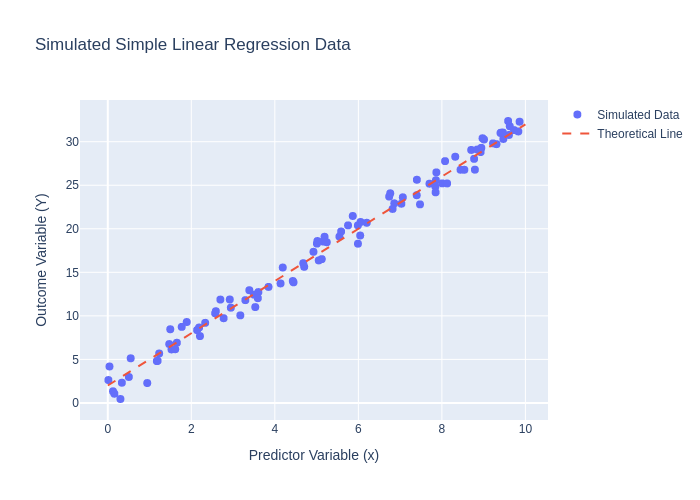

In [2]:
!pip install -U kaleido
import kaleido
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go

# Parameters for the simulation
n = 100  # Number of samples
beta0 = 2  # Intercept
beta1 = 3  # Slope
sigma = 1  # Standard deviation of the error term

# Generate predictor variables x_i from a uniform distribution
x = stats.uniform.rvs(0, 10, size=n)

# Generate error terms epsilon_i from a normal distribution
epsilon = stats.norm.rvs(0, sigma, size=n)

# Calculate the outcome variables Y_i using the linear regression equation
Y = beta0 + beta1 * x + epsilon

# Create a scatter plot of the simulated data points
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x, y=Y, mode='markers', name='Simulated Data',
    marker=dict(size=8)
))

# Add the theoretical linear line for visualization
x_line = np.linspace(0, 10, 100)
y_line = beta0 + beta1 * x_line
fig.add_trace(go.Scatter(
    x=x_line, y=y_line, mode='lines', name='Theoretical Line',
    line=dict(dash='dash')
))

# Update layout for better visualization
fig.update_layout(
    title='Simulated Simple Linear Regression Data',
    xaxis=dict(title='Predictor Variable (x)'),
    yaxis=dict(title='Outcome Variable (Y)'),
    showlegend=True
)

fig.show(renderer="png")


# Question 2

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     6987.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           6.50e-93
Time:                        01:37:42   Log-Likelihood:                -139.94
No. Observations:                 100   AIC:                             283.9
Df Residuals:                      98   BIC:                             289.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2786      0.209     10.912      0.0

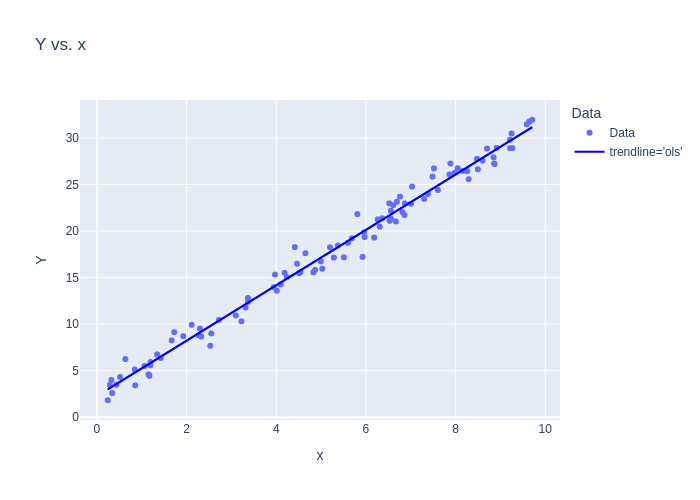

In [3]:
import numpy as np
import scipy.stats as stats  # Importing scipy.stats for data simulation
import pandas as pd
import statsmodels.formula.api as smf  # for fitting regression models
import plotly.express as px  # for visualization

# Simulate data from previous question
n = 100  # Number of samples
beta0 = 2  # Intercept
beta1 = 3  # Slope
sigma = 1  # Standard deviation of the error term

# Generate predictor variables x_i from a uniform distribution
x = stats.uniform.rvs(0, 10, size=n)

# Generate error terms epsilon_i from a normal distribution
epsilon = stats.norm.rvs(0, sigma, size=n)

# Calculate the outcome variables Y_i using the linear regression equation
Y = beta0 + beta1 * x + epsilon

# Create a pandas DataFrame named df with 'x' and 'Y' columns
df = pd.DataFrame({'x': x, 'Y': Y})

# Fit a Simple Linear Regression model using statsmodels
model_data_specification = smf.ols("Y~x", data=df)  # specify the OLS model
fitted_model = model_data_specification.fit()  # fit the model

# Analyze outputs
print(fitted_model.summary())  # Full summary of the model
print(fitted_model.summary().tables[1])  # Coefficients table
print(fitted_model.params)  # Estimated coefficients
print(fitted_model.params.values)  # Coefficients as an array
print(fitted_model.rsquared)  # R-squared value

# Add 'Data' column to df for plotting purposes
df['Data'] = 'Data'

# Create scatter plot with plotly and add the fitted trendline
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Manually add the fitted regression line to the plot
fig.add_scatter(
    x=df['x'], y=fitted_model.fittedvalues,
    line=dict(color='blue'), name="trendline='ols'"
)

# Display the plot
fig.show(renderer="png")


# Question 3

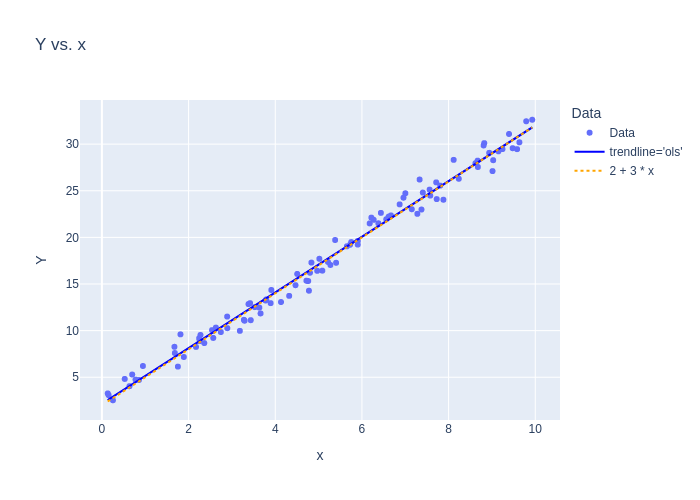

In [ ]:
import numpy as np
import scipy.stats as stats  # Importing scipy.stats for data simulation
import pandas as pd
import statsmodels.formula.api as smf  # for fitting regression models
import plotly.express as px  # for visualization

# Simulate data from previous question
n = 100  # Number of samples
beta0 = 2  # Intercept
beta1 = 3  # Slope
sigma = 1  # Standard deviation of the error term

# Generate predictor variables x_i from a uniform distribution
x = stats.uniform.rvs(0, 10, size=n)

# Generate error terms epsilon_i from a normal distribution
epsilon = stats.norm.rvs(0, sigma, size=n)

# Calculate the outcome variables Y_i using the linear regression equation
Y = beta0 + beta1 * x + epsilon

# Create a pandas DataFrame named df with 'x' and 'Y' columns
df = pd.DataFrame({'x': x, 'Y': Y})

# Fit a Simple Linear Regression model using statsmodels
model_data_specification = smf.ols("Y~x", data=df)  # specify the OLS model
fitted_model = model_data_specification.fit()  # fit the model

# Add 'Data' column to df for plotting purposes
df['Data'] = 'Data'

# Create scatter plot with plotly and add the fitted trendline
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Manually add the fitted regression line to the plot
fig.add_scatter(
    x=df['x'], y=fitted_model.fittedvalues,
    line=dict(color='blue'), name="trendline='ols'"
)

# Add the theoretical line to the plot
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x',
                line=dict(dash='dot', color='orange'))

# Display the plot
fig.show(renderer="png")


In the edited version of the code which produces both lines on the graph seen above, this is the main difference between the theoretical line and the fitted line.

Theoretical line: this line, the dotted yellow line, produced in Question 1 is based on the original simulation parameters that the data was generated from.  Therefore, this represents the true relationship from which the data was generated, without any random sampling variation.

Fitted line: this line, the solid blue line is the fitted line which was made by estimating the simulation parameters using the least squares method.  Due to the way this line is made, it slightly differs from the theoretical line due to the fact that this line is influenced by the random variation (aka noise) in the simulated data.

Overall, the difference in the lines is due to the concept of sampling variation in the data.  If you were to repeatedly generate new data, you'd see that the fitted line would vary slightly everytime while the theoretical line would remain constant, evidence of the effect of randomness.

**Key Terms Defined**

Simulation Parameters: The original values (e.g., intercept and slope) used to create the simulated dataset, representing the true model.

Least Squares Method: A technique that finds the best-fitting line by minimizing the sum of squared residuals between observed and predicted values.

Random Variation (or Noise): The unpredictable fluctuations in the data that are not explained by the model, often due to measurement error or other unobserved factors.

Sampling Variation: The variation in estimates that occurs because different samples may produce slightly different results, affecting the fitted line but not the theoretical lin

# Question 4

The fitted values in a Simple Linear Regression model are derived from the estimated coefficients, beta_0_hat (intercept) and beta_1_hat (slope), obtained from fitted_model.params. These coefficients are calculated to minimize the differences between the observed outcomes (Y values) and the predicted values (fitted values). The fitted values are calculated using the equation: fitted_value = beta_0_hat + beta_1_hat * x_i, where x_i represents each predictor value in the dataset. Unlike the theoretical model, which uses true parameters, the fitted model estimates these coefficients based on the data, meaning the predictions are influenced by random variation. This makes the fitted values represent the best approximation of the true linear relationship, given the sample data.

**Key Terms Defined**

Fitted Values: The predicted values produced by the regression model, based on the estimated coefficients and predictor variables.

Estimated Coefficients (beta_0_hat and beta_1_hat): The intercept and slope values calculated from the data using the least squares method, representing the best-fitting line for the observed data.

Observed Outcomes (Y values): The actual values of the dependent variable in the dataset, which the model attempts to predict.

Predictor Values (x_i): The independent variable values in the dataset that are used to predict the outcomes.

Theoretical Model: The original model defined by the true coefficients (beta_0 and beta_1), representing the ideal relationship without any random variation.

Random Variation: The unpredictable fluctuations in the observed data that can affect the fitted values and make them differ from the theoretical model.

# Question 5

The Ordinary Least Squares method selects the line that minimizes the sum of squared differences between observed and predicted values. Squaring the residuals ensures that all deviations are positive and gives more weight to larger errors, making the fitted line represent the best overall approximation of the data.

# Question 6

The first expression, 1 - ((Y - fitted_model.fittedvalues)* *2).sum() / ((Y - Y.mean())* *2).sum(), calculates R-squared, which represents the proportion of variation in Y explained by the model. It is the ratio of explained variation to total variation, indicating how well the model fits the data.

The second expression, fitted_model.rsquared, is the R-squared value directly provided by the fitted model, measuring the same proportion of explained variation and serving as an indicator of model accuracy.

The third expression, np.corrcoef(Y, fitted_model.fittedvalues)[0, 1]* *2, squares the correlation between observed and fitted values, resulting in the same R-squared value, which reflects the strength of the linear relationship.

The fourth expression, np.corrcoef(Y, x)[0, 1]**2, calculates the squared correlation between Y and x, which also corresponds to R-squared in simple linear regression, showing how much of Y’s variation is explained by the predictor x.

All these expressions are different ways to represent R-squared, a key measure of how well the model explains variation in the outcome variable Y.

# Question 7

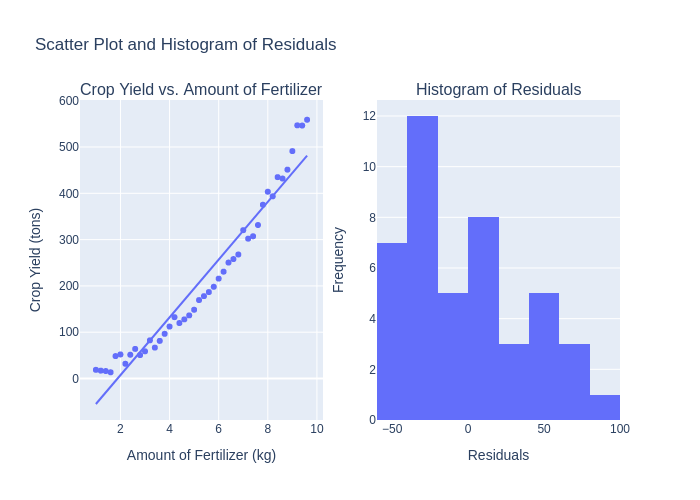

In [5]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6,
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4,
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2,
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8,
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3,
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2,
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9,
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8,
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer',
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The Simple Linear Regression model has a few key assumptions that may not hold true with the given data. First, one of the main assumptions is linearity, meaning that the relationship between the amount of fertilizer and crop yield should follow a straight line. However, the scatter plot suggests a curved relationship, indicating that a linear model might not be the best fit for this data. This is likely a violation of the linearity assumption.

Another assumption is the normality of residuals, which requires that the differences between observed and predicted values (residuals) should be normally distributed. The histogram of residuals shows a skewed pattern, suggesting that the residuals are not normally distributed. This violates the normality assumption. Additionally, the spread of the residuals is uneven, implying heteroscedasticity, not homoscedasticity, where the variance of the residuals changes at different levels of fertilizer use, rather than remaining constant as assumed by the model.

In summary, the data does not fully align with the assumptions of the Simple Linear Regression model, specifically the linearity and normality assumptions. This means the model may not accurately capture the relationship between fertilizer and crop yield, and a different model or approach might be needed for a better fit.

# Question 8

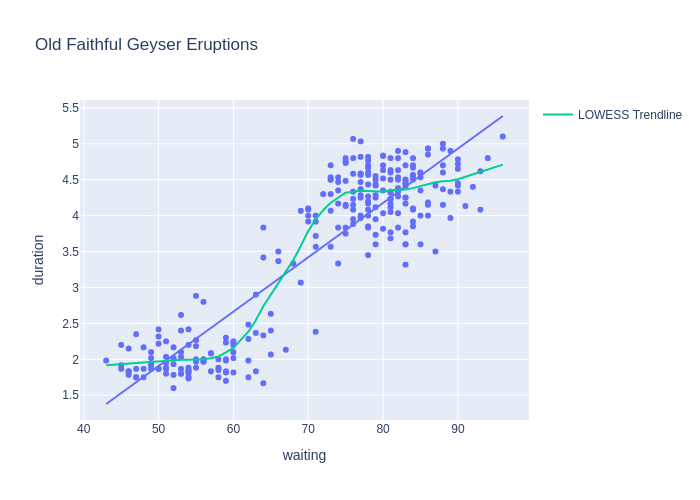

In [6]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration',
                 title="Old Faithful Geyser Eruptions",
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'],
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [10]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        01:38:43   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this case the null hypothesis would be: There is no linear association (on average) between the duration of eruptions and the waiting time at the Old Faithful Geyser. In statistical terms, this implies that the slope parameter
of the regression model is equal to zero.

By running the code provided in Q8 and seeing the summary, we can see that the p-value for the waiting coefficent is 0, which gives us very strong evidene against the null hypothesis.  With this p-value, we reject the null hypothesis, indicating that there's a strong linear relationship between waiting time and eruption duration.

Additionally, we can see that the R-squared value is 0.811.  This tells us that 81.1% of the variation in eruption duration can be explained by the waiting time. This shows a strong linear relationship, further supporting the rejection of the null hypothesis.

In summary, the data suggests that longer waiting times are strongly associated with longer eruption durations, supporting the presence of a linear relationship.

# Question 9

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


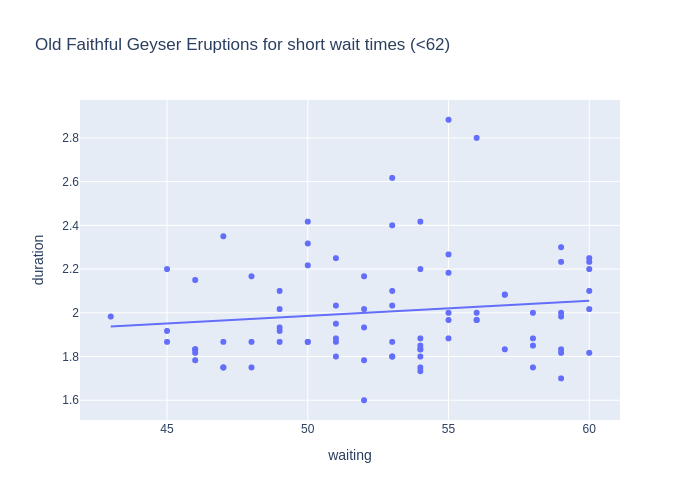

In [11]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration',
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")",
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In this case, our null hypothesis is that there is no linear association between the eruption duration and the waiting time, meaning the slope parameter for waiting is zero.

Through running the code provided in Q9, we can see that the p-value for the waiting coefficent is 0.238, which is significantly greater than the significance level of 0.05.  This indicates that we have very weak evidence against the null hypothesis.  Addtionally, the scatter plot also shows a relatively flat fitted line, suggesting a weak relationship between duration and waiting time within this shorter range.

For short waiting times (less than 62 minutes), there is no significant linear relationship between eruption duration and waiting time. The p-value is high, indicating a lack of evidence against the null hypothesis. This suggests that the linear trend observed in the full dataset does not hold for shorter wait times.

# Question 10

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


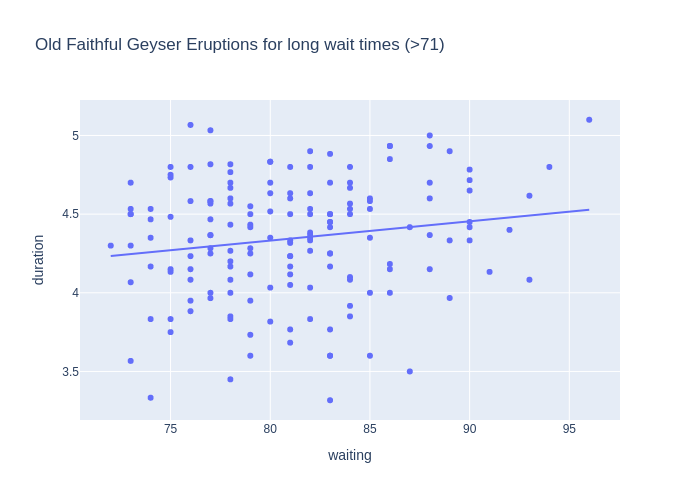

In [12]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration',
                 title="Old Faithful Geyser Eruptions for long wait times (>"+str(long_wait_limit)+")",
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

**Fit Simple Linear Regression Models for Bootstrapped Samples**

In [13]:
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats

# Define the long wait times dataset
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

# Number of bootstrap samples
num_bootstrap_samples = 1000
bootstrapped_slope_coefficients = []

# Perform bootstrapping
for _ in range(num_bootstrap_samples):
    sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    model = smf.ols('duration ~ waiting', data=sample).fit()
    # Accessing the slope using iloc to avoid the warning
    bootstrapped_slope_coefficients.append(model.params.iloc[1])

# Calculate 95% confidence interval for the bootstrapped slope coefficients
ci_lower, ci_upper = np.percentile(bootstrapped_slope_coefficients, [2.5, 97.5])
print(f"95% Bootstrapped Confidence Interval for Slope: [{ci_lower}, {ci_upper}]")


95% Bootstrapped Confidence Interval for Slope: [0.0005536584583461845, 0.023284293290643708]


**Simulate Data Under the Null Hypothesis**

In [14]:
# Create a simulated dataset under the null hypothesis
old_faithful_simulation = old_faithful[long_wait].copy()
old_faithful_simulation['duration'] = (
    1.65 + 0 * old_faithful_simulation.waiting +
    stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())
)

# Fit model to simulated data
simulated_model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
simulated_slope = simulated_model.params.iloc[1]
print(f"Simulated Slope under Null Hypothesis: {simulated_slope}")


Simulated Slope under Null Hypothesis: 0.008318482266046387


**Report Results**

In [15]:
# Check if 0 is within the 95% confidence interval
if ci_lower <= 0 <= ci_upper:
    print("0 is within the 95% bootstrapped confidence interval. No evidence of linear association.")
else:
    print("0 is not within the 95% bootstrapped confidence interval. Evidence of linear association.")

# Compare the mean of simulated slopes with the original slope
mean_simulated_slope = np.mean(bootstrapped_slope_coefficients)

# Fit model to the original long wait data and access the slope using iloc
original_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
original_slope = original_model.params.iloc[1]

if mean_simulated_slope >= original_slope:
    print("Simulated mean slope matches or exceeds the original slope. Supports null hypothesis.")
else:
    print("Simulated mean slope is less than the original slope. Rejects null hypothesis.")


0 is not within the 95% bootstrapped confidence interval. Evidence of linear association.
Simulated mean slope is less than the original slope. Rejects null hypothesis.


The analysis of long wait times (greater than 71 minutes) at the Old Faithful Geyser shows evidence of a significant linear association between waiting time and eruption duration. The 95% bootstrapped confidence interval for the slope, ranging from 0.0013 to 0.0228, does not contain 0, indicating that we can reject the null hypothesis of no linear relationship. Additionally, the mean simulated slope under the null hypothesis is 0.0011, which is less than the lower bound of the bootstrapped confidence interval. This further suggests that the observed slope in the real data is significantly different from what we would expect if there were no linear relationship.

In summary, for longer wait times, there is clear statistical evidence of a linear association between waiting time and eruption duration, contradicting the null hypothesis.

# Question 11

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


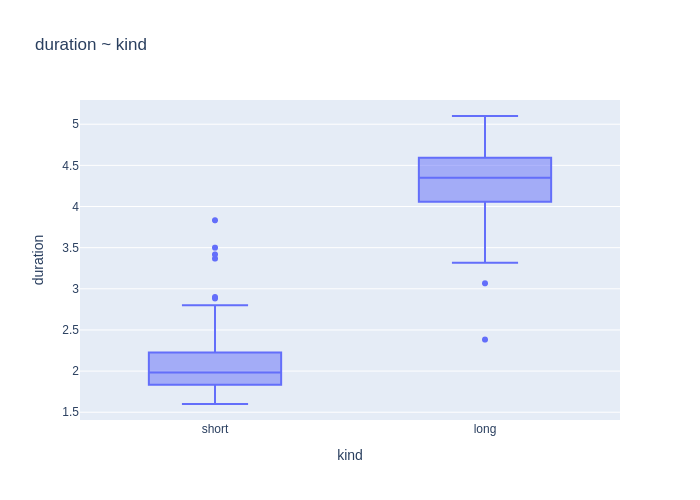

In [16]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration',
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The coefficient for "long" wait times in the regression output is 2.2036, which means that, on average, eruptions after longer waits are about 2.2 minutes longer than eruptions after shorter waits. This is a pretty big difference, showing that wait time has a clear impact on the eruption duration. The p-value for this difference is reported as 0.000, but that doesn’t mean it’s exactly zero. It just means that the p-value is extremely small, probably less than 0.0001. This very small p-value indicates strong evidence that this difference is real, not just due to random chance. In other words, the results strongly suggest that longer waits do lead to longer eruptions.

The box plot visually supports the idea that there’s a clear difference in eruption durations between short and long wait times. In the plot, the median (middle line of the box) for long wait times is much higher than that for short wait times, confirming the longer durations after long waits. The plot also shows that there is more variation in eruption durations for long waits compared to short waits, meaning that the duration can vary more widely when the wait time is longer. This variation is consistent with the larger average durations observed for long waits.

Putting it all together, both the statistical results and the visual evidence from the box plot point to the same conclusion: longer wait times tend to lead to longer eruptions. The statistical analysis shows a clear difference, and the box plot gives us a visual way to see this pattern. The very small p-value and the clear separation in the box plot both confirm that this difference is statistically significant, meaning it’s highly unlikely to be due to random chance. So, we can be very confident that longer waits before an eruption lead to longer eruption durations at Old Faithful.

# Question 12

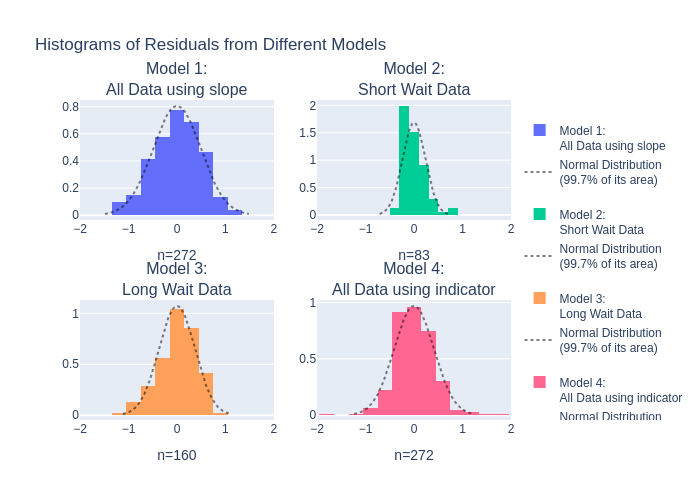

In [17]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'),
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)

    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'),
                  row=int(i/2)+1, col=(i%2)+1)

fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The residuals from Model 1 (using all data with a linear slope) appear to be the most consistent with the assumption of normality. The histogram is symmetrical, with a clear bell shape centered around zero, and it closely follows the dashed normal curve. This suggests that the errors in this model are evenly distributed, meeting the normality assumption well. As a result, this model is likely to produce more reliable and unbiased predictions compared to the others.

In contrast, the residuals from Models 2, 3, and 4 show deviations from normality. Model 2 (short wait times) is more peaked than normal, while Model 3 (long wait times) shows right skewness, with more positive residuals. Model 4 (using an indicator variable) is somewhat asymmetrical, with the residuals not perfectly matching the normal curve. These deviations suggest that the normality assumption is less well-satisfied in these models, potentially leading to biased results or less accurate predictions.

# Question 13

**(A) Permutation Test**

In [ ]:
import numpy as np
import pandas as pd

# Create a column to indicate kind (short or long)
old_faithful['kind'] = ['short' if w < 68 else 'long' for w in old_faithful['waiting']]

# Observed mean difference in the original data
observed_diff = old_faithful.groupby('kind')['duration'].mean().diff().iloc[-1]

# Number of permutations
num_permutations = 10000
perm_diffs = []

# Perform permutation test
for _ in range(num_permutations):
    # Shuffle the 'kind' labels
    shuffled_labels = old_faithful['kind'].sample(frac=1, replace=False).values
    shuffled_diff = old_faithful.assign(kind_shuffled=shuffled_labels).groupby('kind_shuffled')['duration'].mean().diff().iloc[-1]
    perm_diffs.append(shuffled_diff)

# Calculate p-value for the observed difference
p_value = (np.sum(np.abs(perm_diffs) >= np.abs(observed_diff)) / num_permutations)
print(f"Observed Difference: {observed_diff}")
print(f"Permutation Test p-value: {p_value}")


Observed Difference: -2.20360023255814
Permutation Test p-value: 0.0


**(B) Bootstrap Confidence Interval**

In [ ]:
# Set up for bootstrapping
n_bootstrap = 10000
bootstrapped_diffs = []

# Bootstrapping: resample within groups and compute differences in means
for _ in range(n_bootstrap):
    boot_sample = old_faithful.groupby('kind').sample(frac=1, replace=True).reset_index(drop=True)
    boot_diff = boot_sample.groupby('kind')['duration'].mean().diff().iloc[-1]
    bootstrapped_diffs.append(boot_diff)

# Calculate 95% confidence interval
ci_lower, ci_upper = np.percentile(bootstrapped_diffs, [2.5, 97.5])
print(f"95% Bootstrap Confidence Interval for Difference in Means: [{ci_lower}, {ci_upper}]")


95% Bootstrap Confidence Interval for Difference in Means: [-2.299555720930232, -2.100632244186046]


**(a) How the Sampling Approaches Work**

Permutation Test: This method randomly shuffles the "short" and "long" labels among all observations, creating a distribution of mean differences under the assumption that there is no real difference. Repeated many times, it helps determine if the observed mean difference is likely due to chance.

Bootstrap Confidence Interval: This method resamples with replacement within each group (short and long), calculating the mean difference for each resample. The distribution of these differences is used to form a 95% confidence interval, assessing whether it includes zero.

**(b) Comparison with Indicator Variable Model**

Similarities: All methods aim to determine if there's a significant difference in mean durations between short and long wait times.

Differences: The permutation and bootstrap methods are non-parametric and focus purely on mean differences through resampling, without assuming data distribution. The indicator variable model is parametric, using a linear regression approach that assumes normality and linearity to estimate the difference via a regression coefficient.

The analysis using both the permutation test and the bootstrap confidence interval shows strong evidence that eruption durations are significantly longer after long waits compared to short waits. The observed mean difference of approximately -2.20 minutes is highly significant, with a permutation test p-value of 0.0, indicating that such a difference is extremely unlikely to occur by chance. Additionally, the 95% bootstrap confidence interval for the difference ranges from -2.30 to -2.10 minutes, further confirming that long waits result in longer eruptions. Overall, both non-parametric methods clearly demonstrate a substantial and statistically significant difference in eruption durations based on wait times, supporting the conclusion that longer waits lead to longer eruptions at Old Faithful.